<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module2/M2_2/3_TheSimplexMethod_Maximization_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Simplex Method: 3D Maximization
**OPIM 5604: Business Decision Modeling - University of Connecticut**

Material from: "Elementary Linear Algebra" - 8th Edition (Ron Larson) - Chapter 9.

-------------------------------------------------------
**Objectives:**
* Write the simplex tableau for a linear programming problem. 
* Use pivoting to find an improved solution.  
* Use the simplex method to solve a linear programming problem that maximizes an objective function.  
* Use the simplex method to find an optimal solution to a real-world application.

In [ ]:
# this function is useful for coloring a single cell
# you'll see how to use it later

# Custom function to color the desired cell
def styling_specific_cell(x,row_idx,col_idx):
    color = 'background-color: yellow; color: red'
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler

**Background**: For linear programming problems involving two variables, the graphical solution method is convenient. For problems involving more than two variables or large numbers of constraints, it is better to use methods that are adaptable to technology. One such method is the simplex method, developed by George Dantzig in 1946. It provides a systematic way of examining the vertices of the feasible region to determine the optimal value of the objective function.

Say you want to find the maximum value of  $z= 2x_1-x_2+2x_3$ , where the decision variables  $x_1$, $x_2$  and  $x_3$  are nonnegative, subject to the constraints:

$2x_1+x_2≤10$    
$x_1+2x_2-2x_3≤20$   
$x_2+2x_3≤5$      

The left-hand side (LHS) of each inequality is less than or equal to the right-hand side, so there must exist nonnegative numbers $s_1$, $s_2$, and $s_3$ that can be added to the left side of each equation to produce the system of linear equations

The **left-hand side (LHS)** of each **inequality** is less than or equal to the right-hand side, so there must exist nonnegative numbers $s_1$, $s_2$, and $s_3$ that can be added to the left side of each equation to produce the system of linear equations

$2x_1+ x_2+      s_1=        10$  
$x_1+ 2x_2- 2x_3+    s_2=  20$  
$x_2+ 2x_3+           s_3= 5$   
The numbers $s_1$, $s_2$, and $s_3$ are called **slack variables** because they represent the “slack” in each inequality. Slack just means any unused part - sometimes there are unused hours (painting constraint from furniture example) - and sometimes there's nothing leftover and the slack is zero (this is called a **binding constraint**). More on this a little later on.

For now, you should be able to write the LP problem in **standard form for a maximization problem** (constraints written with slack variables on LHS, there are ONLY less than or equal to ( ≤ ) inequalities which we turn into equal signs, and the RHS remains the same).

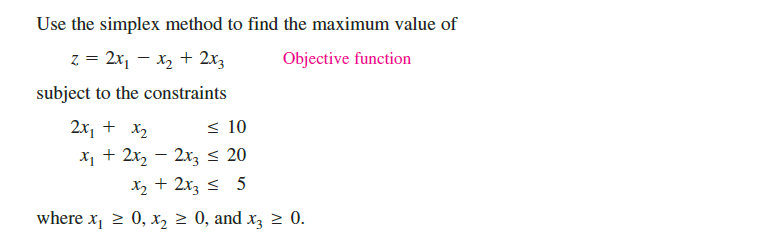

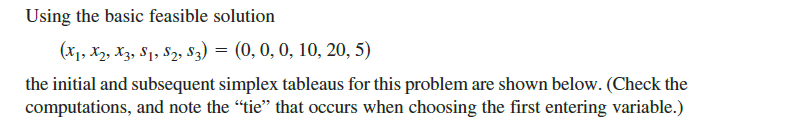

Let's use the simplex method to find an improved solution for the linear programming problem represented by the tableau shown below. We will use numpy to perform all operations (corresponds to textbook example). We will call this matrix $A$.

# Pivoting
After you have set up the initial simplex tableau for a linear programming problem, the simplex method consists of checking for optimality and then, when the current solution is not optimal, improving the current solution. (An improved solution is one that has a larger z-value than the current solution.)

To improve the current solution, bring a new basic variable into the solution, the entering variable. This implies that one of the current basic variables (the departing variable) must leave, otherwise you would have too many variables for a basic solution. Choose the entering and departing variables as listed below.

1. The **entering variable** corresponds to the least (the most negative) entry in the bottom row of the tableau, excluding the “b-column.”
2. The **departing variable** corresponds to the least nonnegative ratio  $b_i$/$a_i$$_j$  in the column determined by the entering variable, when  $a_i$$_j$$ \geq 0$
3. The entry in the simplex tableau in the entering variable’s column and the departing variable’s row is the pivot.

Finally, to form the improved solution, apply Gauss-Jordan elimination (https://online.stat.psu.edu/statprogram/reviews/matrix-algebra/gauss-jordan-elimination) to the column that contains the pivot.

# Pivot #1
Let's use the simplex method to find an improved solution for the linear programming problem represented by the tableau shown below. We will use numpy to perform all operations (corresponds to textbook example). We will call this matrix $A$ .

In [ ]:
import numpy as np
from sympy import *
from fractions import Fraction

A = np.array([[2, 1, 0, 1, 0, 0, 10],
              [1, 2,-2, 0, 1, 0, 20],
              [0, 1, 2, 0, 0, 1, 5],
              [-2, 1,-2, 0, 0, 0, 0]])

# convert to sympy array for fractions (later on)

from sympy import Matrix
from sympy import Rational

A = Matrix(A)
pprint(A) # voila - looks great! don't forget the extra p for pretty print

⎡2   1  0   1  0  0  10⎤
⎢                      ⎥
⎢1   2  -2  0  1  0  20⎥
⎢                      ⎥
⎢0   1  2   0  0  1  5 ⎥
⎢                      ⎥
⎣-2  1  -2  0  0  0  0 ⎦


In [ ]:
# make it pretty
import pandas as pd
tmp = pd.DataFrame(np.array(A)) 
tmp.columns = ['x1', 'x2','x3', 's1', 's2', 's3', 'b']
tmp.index=['R0', 'R1', 'R2', 'R3']
tmp

,x1,x2,x3,s1,s2,s3,b
R0,2,1,0,1,0,0,10
R1,1,2,-2,0,1,0,20
R2,0,1,2,0,0,1,5
R3,-2,1,-2,0,0,0,0


## Entering Variable
 To improve this solution, choose  $x_3$  as the entering variable, because -2 is the least entry in the bottom row and notice there is a "tie". If there is a tie, you randomly pick one to enter.

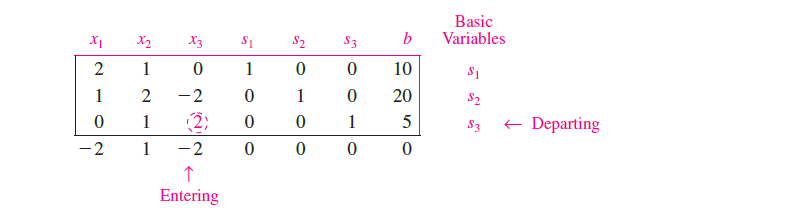

Let's highlight just the entering variable (column).

In [ ]:
# let's show this in code
# make it pretty
tmp = pd.DataFrame(np.array(A)) # you only need this in the first example
tmp.columns = ['x1', 'x2', 'x3','s1', 's2', 's3', 'b']
tmp.index=['R0', 'R1', 'R2', 'R3']
tmp

# apply style to a column
tmp.style\
.apply(lambda x: ['background: lightblue' if x.name == 'x3' else '' for i in x])

,x1,x2,x3,s1,s2,s3,b
R0,2,1,0,1,0,0,10
R1,1,2,-2,0,1,0,20
R2,0,1,2,0,0,1,5
R3,-2,1,-2,0,0,0,0


## Departing Variable

**Departing Variable** To find the departing variable, locate the  b ’s that have corresponding positive elements in the entering variable’s column and form the ratios

5/2= 2.5  `[smallest nonnegative ratio!]`



Here the least nonnegative ratio is 2.5, so choose  $s_3$ ($R2$) as the departing variable.

In [ ]:
# let's show this in code
# make it pretty
tmp = pd.DataFrame(np.array(A)) # you only need this in the first example
tmp.columns = ['x1', 'x2', 'x3','s1', 's2', 's3', 'b']
tmp.index=['R0', 'R1', 'R2', 'R3']
tmp

# highlight a single cell pivot element
idx_r = 2
idx_c = 2

# apply style to rows and columns
tmp.style\
.apply(lambda x: ['background: lightblue' if x.name == 'x3' else '' for i in x])\
.apply(lambda x: ['background: lightblue' if x.name == 'R2' else '' for i in x], axis=1)\
.apply(styling_specific_cell, row_idx = idx_r, col_idx = idx_c, axis = None)

,x1,x2,x3,s1,s2,s3,b
R0,2,1,0,1,0,0,10
R1,1,2,-2,0,1,0,20
R2,0,1,2,0,0,1,5
R3,-2,1,-2,0,0,0,0


## Turn pivot element into a '1'.
Now we need to turn the pivot element into a '1'.

In [ ]:
# let's get rid of the '-2' in Row 2 and turn it into a 1
# R2/2
A[2,:] = Fraction(1,2)*A[2,:] # we are just multiplying by 1/2!
A[2,:] # check your work! all looks great!

Matrix([[0, 1/2, 1, 0, 0, 1/2, 5/2]])

## Use GJ elimination to turn all other values above and below pivot element into 0s.

### R1

In [ ]:
# and here is how we update it!
# R1 + R2
A[1,:] = A[1,:] + 2*A[2,:]
A[1,:]

Matrix([[1, 3, 0, 0, 1, 1, 25]])

Remember, we are looking at $x3$, which is in the third column.

### R3

In [ ]:
# now do the next one, let's get rid of the '-2' in R3
# R2+R3 should do the trick
A[3,:] = A[3,:] + 2*A[2,:]
A[3,:] # check your work! good!


Matrix([[-2, 2, 0, 0, 0, 1, 5]])

Remember, we are looking at $x3$, which is in the third column.

## Check your work - feasible solution?

And now let's look at $A$ after Gauss-Jordan elimination.

Is it a feasible solution? Sure is!

In [ ]:
# and now let's look at A after Gauss-Jordan elimation
pprint(A)

⎡2    1   0  1  0   0   10 ⎤
⎢                          ⎥
⎢1    3   0  0  1   1   25 ⎥
⎢                          ⎥
⎢0   1/2  1  0  0  1/2  5/2⎥
⎢                          ⎥
⎣-2   2   0  0  0   1    5 ⎦


In [ ]:
# want to see it with nice column and row headers?
# use pandas to visaulize it

import pandas as pd
tmp = pd.DataFrame(np.array(A))
tmp.columns = ['x1', 'x2', 'x3','s1', 's2', 's3', 'b']
tmp.index=['R0', 'R1', 'R2', 'R3']
tmp

,x1,x2,x3,s1,s2,s3,b
R0,2,1,0,1,0,0,10
R1,1,3,0,0,1,1,25
R2,0,1/2,1,0,0,1/2,5/2
R3,-2,2,0,0,0,1,5


Note that  $x_3$  has replaced  $s_3$  in the basic variables column and the improved solution $(x_1,x_2,x_3,s_1,s_2,s_3)=(0,0,5/2,10,25,0)$  has a $z$  value of $z = 2x_1 -x_2 +2x_3 = 2(0) -6(0)+ 2(5/2) = 5$.

Also note that the basic variables are  $x_3$ ,  $s_1$  and  $s_2$ . These are columns (variables) with a single '1' and the rest of the values are '0'.

### Any negative numbers in bottom row?
Yup. We have to keep going.

# Pivot #2
The improved solution (above) is not optimal because the bottom row has a negative entry. So, apply another iteration of the simplex method to improve the solution further. Choose $x_1$  as the **entering variable**.Moreover, the lesser of the ratios  $10$$/2=5$  and  $25$$/1=25$   , so  $s_1$  is the departing variable. Gauss-Jordan elimination produces the matrices shown below.

## Entering Variable
Since the largest negative number is $-2$ from $x_1$, this is our entering variable.

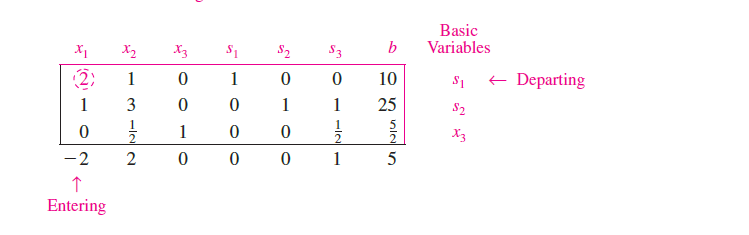

## Departing Variable
Choose the smallest possible $b/a$ ratio.

In [ ]:
10/2 #R0 (s1)

5.0

In [ ]:
25/1 #R1 (s2)

25.0

In [ ]:
# R2
# infinity!
# 5/2/0 # do div by 0, goes to infinity... try 0.000000001 

## Turn pivot element into a '1'

In [ ]:
# first, we need to turn the pivot element into a 1
A[0,:] = Fraction(1,2)*A[0,:]

## Use GJ elimiation to turn all of values above and below pivot element into 0s.

Remember: keep your 'row of interest' and add multiples of the row with the pivot element to make 0s above and below the pivot element.

### R1

In [ ]:
#R1
A[1,:] = A[1,:] + (-1)*A[0,:] 

### R3

In [ ]:
# R3
A[3,:] = A[3,:] + 2*A[0,:]+
A[3,:]

Matrix([[0, 3, 0, 1, 0, 1, 15]])

## Check your work - feasible solution?

In [ ]:
# show what you did 
pprint(A)

⎡1  1/2  0  1/2   0   0    5 ⎤
⎢                            ⎥
⎢0  5/2  0  -1/2  1   1   20 ⎥
⎢                            ⎥
⎢0  1/2  1   0    0  1/2  5/2⎥
⎢                            ⎥
⎣0   3   0   1    0   1   15 ⎦


In [ ]:
import pandas as pd
tmp = pd.DataFrame(np.array(A))
tmp.columns = ['x1', 'x2','x3', 's1', 's2', 's3', 'b']
tmp.index=['R0', 'R1', 'R2', 'R3']

tmp

,x1,x2,x3,s1,s2,s3,b
R0,1,1/2,0,1/2,0,0,5
R1,0,5/2,0,-1/2,1,1,20
R2,0,1/2,1,0,0,1/2,5/2
R3,0,3,0,1,0,1,15


### Any negative numbers in bottom row?
No! You have found the optimal solution.

You are **DONE!** Time to read off the final solution.

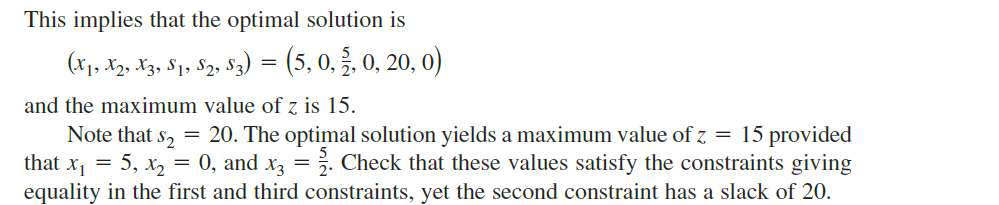

# Appendix: Code from colorful tables


In [ ]:
# awesome latex symbols! 
# https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols
# http://www.emerson.emory.edu/services/latex/latex_119.html

In [ ]:
# a random sample array

A = Matrix([[60,   12,   10,   1,  0,  0.12],
            [60,    6,   30,   0,  1,  0.15],                      
            [-300,  -36,  -90,  0,  0,   0]])

# make it pretty
tmp = pd.DataFrame(np.array(A).astype(float)) # you only need this in the first example
tmp.columns = ['y1', 'y2', 'y3', 's1', 's2', 'b']
tmp.index=['R0', 'R1', 'R2']
tmp

# add some color to highlight s1 and s2 and z
# Custom function to color the desired cell
def styling_specific_cell(x,row_idx,col_idx):
    color = 'background-color: yellow; color: red'
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler

# highlight a single cell pivot element
idx_r = 0
idx_c = 0

# apply style to rows and columns
tmp.style\
.apply(lambda x: ['background: lightblue' if x.name == 'y1' else '' for i in x])\
.apply(lambda x: ['background: lightblue' if x.name == 'R0' else '' for i in x], axis=1)\
.apply(styling_specific_cell, row_idx = idx_r, col_idx = idx_c, axis = None)


,y1,y2,y3,s1,s2,b
R0,60.000000,12.000000,10.000000,1.000000,0.000000,0.120000
R1,60.000000,6.000000,30.000000,0.000000,1.000000,0.150000
R2,-300.000000,-36.000000,-90.000000,0.000000,0.000000,0.000000


# Appendix: spacing out mathematical symbols
Double click this text cell to see how much spacing is required... it's a lot! Also take a look at how to make a table in a Colab notebook.

$z = 4x_1 + 6x_2$

$\;-x_1 \;+ \;\;x_2 + s_1 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; = 11$

$\;\;\;\; x_1 \;+ \;\;x_2 \;\;\;\;\;\;\;\; + s_2 \;\;\;\;\;\;\;\; = 27$

$\;\;\;2x_1 + 5x_2 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;+ s_3 = 90$

is shown as

$x_1$ | $x_2$ | $s_1$ | $s_2$ | $s_3$ | $b$
--- | --- | --- | --- | --- | ---
-1 | 1| 1 | 0| 0| 11
1  | 1| 0 |1 |0 |27
2  |5 |0  |0 |1 |90
-4 |-6|0  |0 |0 |**0 ($z$)**